In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob

# 1. Load dataset

In [2]:
#load dataset

df = pd.read_csv('amazon.csv')

In [3]:
df.head()

,Profile Name,Ratings,Heading,Date,Review
0,biswajoy,4,Echo nest mini,28-09-2022,I had a mini for some time but it just wouldn’...
1,Tech Enthusiast,4,Not bad,1-10-2022,Just bought it for fun. No real use other than...
2,Abhinav Raj,4,If you want to full control of your device the...,28-09-2022,Alexa can't take over everything if you want t...
3,Nidhisingh,4,It's osm but when we increase volume the bass ...,1-10-2022,It's good but when we increase volume the bass...
4,Dheeraj,4,Amazing sound quality andbetter performance,1-10-2022,Comes with wipro wifi smart bulb ...Amazing deal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile Name  2170 non-null   object
 1   Ratings       2170 non-null   int64 
 2   Heading       2170 non-null   object
 3   Date          2170 non-null   object
 4   Review        2170 non-null   object
dtypes: int64(1), object(4)
memory usage: 84.9+ KB


In [5]:
df.shape

(2170, 5)

# 2. Data Cleaning

In [6]:
# change text to lower case

df['Heading'] = df['Heading'].apply(lambda x: x.lower())
df['Review'] = df['Review'].apply(lambda x: x.lower())
df.head()

,Profile Name,Ratings,Heading,Date,Review
0,biswajoy,4,echo nest mini,28-09-2022,i had a mini for some time but it just wouldn’...
1,Tech Enthusiast,4,not bad,1-10-2022,just bought it for fun. no real use other than...
2,Abhinav Raj,4,if you want to full control of your device the...,28-09-2022,alexa can't take over everything if you want t...
3,Nidhisingh,4,it's osm but when we increase volume the bass ...,1-10-2022,it's good but when we increase volume the bass...
4,Dheeraj,4,amazing sound quality andbetter performance,1-10-2022,comes with wipro wifi smart bulb ...amazing deal


In [7]:
#Removing HTML tags like <html><h2>
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [8]:
df['Heading'] = df['Heading'].apply(strip_html_tags)
df['Review'] = df['Review'].apply(strip_html_tags)
df.head()

C:\Users\dpain\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,Profile Name,Ratings,Heading,Date,Review
0,biswajoy,4,echo nest mini,28-09-2022,i had a mini for some time but it just wouldn’...
1,Tech Enthusiast,4,not bad,1-10-2022,just bought it for fun. no real use other than...
2,Abhinav Raj,4,if you want to full control of your device the...,28-09-2022,alexa can't take over everything if you want t...
3,Nidhisingh,4,it's osm but when we increase volume the bass ...,1-10-2022,it's good but when we increase volume the bass...
4,Dheeraj,4,amazing sound quality andbetter performance,1-10-2022,comes with wipro wifi smart bulb ...amazing deal


In [9]:
#Expanding Contractions like don’t to do not
from contractions import CONTRACTION_MAP

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [10]:
df['Heading'] = df['Heading'].apply(expand_contractions)
df['Review'] = df['Review'].apply(expand_contractions)
df.head()

,Profile Name,Ratings,Heading,Date,Review
0,biswajoy,4,echo nest mini,28-09-2022,i had a mini for some time but it just wouldn’...
1,Tech Enthusiast,4,not bad,1-10-2022,just bought it for fun. no real use other than...
2,Abhinav Raj,4,if you want to full control of your device the...,28-09-2022,alexa cannot take over everything if you want ...
3,Nidhisingh,4,it is osm but when we increase volume the bass...,1-10-2022,it is good but when we increase volume the bas...
4,Dheeraj,4,amazing sound quality andbetter performance,1-10-2022,comes with wipro wifi smart bulb ...amazing deal


In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub('rt[\s]+', '', text)
    text = re.sub('@[A-Za-z0-9]+', '', text)
    text = re.sub('#', '', text)
    text = re.sub('&amp;', '', text)
    text = re.sub(r'[\r|\n|\r\n]+', '', text)
    text = re.sub('https:?\/\/\S+', '', text)
    text = re.sub(r'[:_!?,;-]', '', text)
    return text

df['Heading'] = df['Heading'].apply(clean_text)
df['Review'] = df['Review'].apply(clean_text)
df.head()

,Profile Name,Ratings,Heading,Date,Review
0,biswajoy,4,echo nest mini,28-09-2022,i had a mini for some time but it just wouldn’...
1,Tech Enthusiast,4,not bad,1-10-2022,just bought it for fun. no real use other than...
2,Abhinav Raj,4,if you want to full control of your device the...,28-09-2022,alexa cannot take over everything if you want ...
3,Nidhisingh,4,it is osm but when we increase volume the bass...,1-10-2022,it is good but when we increase volume the bas...
4,Dheeraj,4,amazing sound quality andbetter performance,1-10-2022,comes with wipro wifi smabulb ...amazing deal


In [12]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.rep1ace(word, dictionary[word.lower()])
    return text

In [13]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [14]:
df['Heading'] = df['Heading'].apply(lambda x: lookup_dict(x,emoticon_dict))
df['Review'] = df['Review'].apply(lambda x: lookup_dict(x,emoticon_dict))
df.head(10)

,Profile Name,Ratings,Heading,Date,Review
0,biswajoy,4,echo nest mini,28-09-2022,i had a mini for some time but it just wouldn’...
1,Tech Enthusiast,4,not bad,1-10-2022,just bought it for fun. no real use other than...
2,Abhinav Raj,4,if you want to full control of your device the...,28-09-2022,alexa cannot take over everything if you want ...
3,Nidhisingh,4,it is osm but when we increase volume the bass...,1-10-2022,it is good but when we increase volume the bas...
4,Dheeraj,4,amazing sound quality andbetter performance,1-10-2022,comes with wipro wifi smabulb ...amazing deal
5,kaushik.s,4,affordable for 1.5k,28-09-2022,its good
6,Vishal waghmare,4,awesome product specialy this price range,28-09-2022,overall nice product
7,RS,4,excellent,27-09-2022,really very good product. sound quality excell...
8,Prashanth Patil,4,good,29-09-2022,good
9,Sahid Afridi,4,thik hi hey bas kavi kawar slow ho jata hey a ...,29-09-2022,4 people found this helpful


# 4. Check Word-Frequency

In [15]:
def gen_freq(text):
    word_list = [] #initiate an empty list that will store all words
    
    for tw_words in text.split():
        word_list.extend(tw_words) #keep on populating all words in the list
        
    #calculate the frequency of each word
    word_freq = pd.Series(word_list).value_counts()
    
    #print top 20 words in the list
    print(word_freq[:20])
    return word_freq

gen_freq(df.Heading.str)    

good       478
product    365
is         275
not        212
it         192
nice       181
very       158
alexa      156
for        153
to         135
the        113
sound      107
a          106
best       104
but        100
quality     97
and         95
in          84
with        77
awesome     75
dtype: int64


good       478
product    365
is         275
not        212
it         192
          ... 
prapar       1
welcome      1
warm         1
house        1
bettery      1
Length: 1768, dtype: int64

# 5. Apply Sentiment Analysis to reviews Headline

In [16]:
new_df = df.copy()

In [17]:
new_df.drop(['Profile Name','Ratings','Date','Review'], axis = 1, inplace=True) 

In [18]:
new_df.head(10)

,Heading
0,echo nest mini
1,not bad
2,if you want to full control of your device the...
3,it is osm but when we increase volume the bass...
4,amazing sound quality andbetter performance
5,affordable for 1.5k
6,awesome product specialy this price range
7,excellent
8,good
9,thik hi hey bas kavi kawar slow ho jata hey a ...


In [19]:
new_df = new_df.rename(columns={'Heading': 'text'})

In [20]:
new_df

,text
0,echo nest mini
1,not bad
2,if you want to full control of your device the...
3,it is osm but when we increase volume the bass...
4,amazing sound quality andbetter performance
...,...
2165,good
2166,excellent product
2167,nice product
2168,satisfied for price


In [21]:
#get subjectivity
def get_subj(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#create subj and polarity columns in data frame
new_df['Subjectivity'] = new_df['text'].apply(get_subj)
new_df['Polarity'] = new_df['text'].apply(get_polarity)

In [22]:
#display dataframe

new_df.head(20)

,text,Subjectivity,Polarity
0,echo nest mini,0.000000,0.000
1,not bad,0.666667,0.350
2,if you want to full control of your device the...,0.425000,0.675
3,it is osm but when we increase volume the bass...,0.500000,-0.150
4,amazing sound quality andbetter performance,0.650000,0.500
5,affordable for 1.5k,0.000000,0.000
6,awesome product specialy this price range,1.000000,1.000
7,excellent,1.000000,1.000
8,good,0.600000,0.700
9,thik hi hey bas kavi kawar slow ho jata hey a ...,0.400000,-0.300


# Categorize according to Polarity

If < 0 --> Negative
If >0 --> Positive
If ==0 --> Neutral

In [23]:
#categorize polarity into pos, neg, neutral

def category(polarity):
    if polarity <= -0.5:
        return 'Extremely Negative'
    elif polarity < 0:
        return 'Slightly Negative'
    elif polarity >= 0.5:
        return 'Extremely Positive'
    elif polarity > 0:
        return 'Slightly Positive'
    else:
        return 'Neutral'
    
new_df['Category'] = new_df['Polarity'].apply(category)

In [24]:
#display dataframe

new_df.head(15)

,text,Subjectivity,Polarity,Category
0,echo nest mini,0.000000,0.000,Neutral
1,not bad,0.666667,0.350,Slightly Positive
2,if you want to full control of your device the...,0.425000,0.675,Extremely Positive
3,it is osm but when we increase volume the bass...,0.500000,-0.150,Slightly Negative
4,amazing sound quality andbetter performance,0.650000,0.500,Extremely Positive
5,affordable for 1.5k,0.000000,0.000,Neutral
6,awesome product specialy this price range,1.000000,1.000,Extremely Positive
7,excellent,1.000000,1.000,Extremely Positive
8,good,0.600000,0.700,Extremely Positive
9,thik hi hey bas kavi kawar slow ho jata hey a ...,0.400000,-0.300,Slightly Negative


In [25]:
#Count the number of pos, neg & neutral tweets
new_df['Category'].value_counts()

Extremely Positive    1087
Neutral                544
Slightly Positive      387
Slightly Negative      108
Extremely Negative      44
Name: Category, dtype: int64

In [26]:
#percentage of pos, neg & neutral tweets
new_df['Category'].value_counts()/df.shape[0]*100

Extremely Positive    50.092166
Neutral               25.069124
Slightly Positive     17.834101
Slightly Negative      4.976959
Extremely Negative     2.027650
Name: Category, dtype: float64

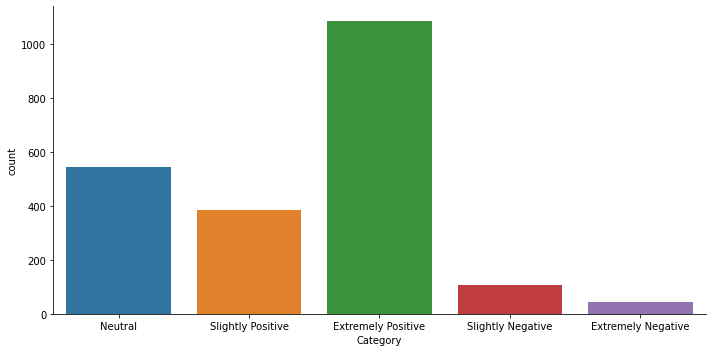

In [27]:
#make a graph of categories
sns.catplot(x='Category',kind='count',data=new_df, aspect=2 )

In [28]:
#Segregate Negative

filter = {'Slightly Negative'}
df_positive = new_df.loc[new_df['Category'].isin(filter)]
df_positive.head()

,text,Subjectivity,Polarity,Category
3,it is osm but when we increase volume the bass...,0.500000,-0.150000,Slightly Negative
9,thik hi hey bas kavi kawar slow ho jata hey a ...,0.400000,-0.300000,Slightly Negative
133,beter than 4 th gen bass of the speaker is bal...,0.500000,-0.150000,Slightly Negative
180,compared to old 3rd generation alexa. this loo...,0.213333,-0.043333,Slightly Negative
212,not good,0.600000,-0.350000,Slightly Negative


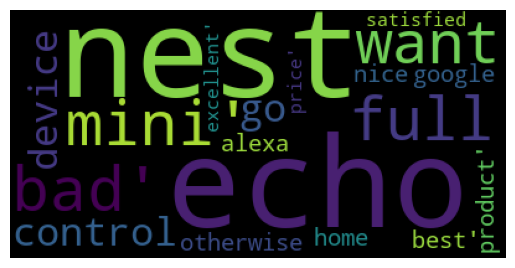

In [29]:

from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopwords = stopwords.words('english')


text = new_df['text'].values 

wordcloud = WordCloud(stopwords=stopwords).generate(str(text))


plt.imshow(wordcloud)

plt.axis("off")
plt.show()

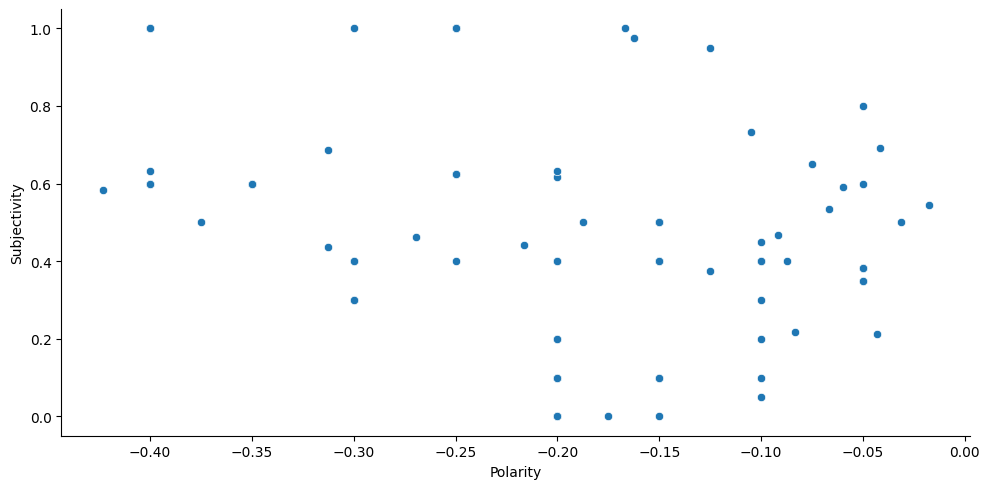

In [30]:
#Plot Subj & polarity
sns.relplot(x='Polarity', y='Subjectivity', data=df_positive, aspect=2)

# 5. Apply Sentiment Analysis to reviews text

In [31]:
new_df = df.copy()

In [32]:
new_df.drop(['Profile Name','Ratings','Date','Heading'], axis = 1, inplace=True) 

In [33]:
new_df.head(10)

,Review
0,i had a mini for some time but it just wouldn’...
1,just bought it for fun. no real use other than...
2,alexa cannot take over everything if you want ...
3,it is good but when we increase volume the bas...
4,comes with wipro wifi smabulb ...amazing deal
5,its good
6,overall nice product
7,really very good product. sound quality excell...
8,good
9,4 people found this helpful


In [34]:
new_df = new_df.rename(columns={'Review': 'text'})

In [35]:
#get subjectivity
def get_subj(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#create subj and polarity columns in data frame
new_df['Subjectivity'] = new_df['text'].apply(get_subj)
new_df['Polarity'] = new_df['text'].apply(get_polarity)

In [36]:
#display dataframe

new_df.head(20)

,text,Subjectivity,Polarity
0,i had a mini for some time but it just wouldn’...,0.573571,0.372857
1,just bought it for fun. no real use other than...,0.243750,-0.031250
2,alexa cannot take over everything if you want ...,0.525000,0.175000
3,it is good but when we increase volume the bas...,0.566667,0.416667
4,comes with wipro wifi smabulb ...amazing deal,0.000000,0.000000
5,its good,0.600000,0.700000
6,overall nice product,0.500000,0.300000
7,really very good product. sound quality excell...,0.709048,0.470000
8,good,0.600000,0.700000
9,4 people found this helpful,0.000000,0.000000


# Categorize according to Polarity

If < 0 --> Negative
If >0 --> Positive
If ==0 --> Neutral

In [37]:
#categorize polarity into pos, neg, neutral

def category(polarity):
    if polarity <= -0.5:
        return 'Extremely Negative'
    elif polarity < 0:
        return 'Slightly Negative'
    elif polarity >= 0.5:
        return 'Extremely Positive'
    elif polarity > 0:
        return 'Slightly Positive'
    else:
        return 'Neutral'
    
new_df['Category'] = new_df['Polarity'].apply(category)

In [38]:
#display dataframe

new_df.head(15)

,text,Subjectivity,Polarity,Category
0,i had a mini for some time but it just wouldn’...,0.573571,0.372857,Slightly Positive
1,just bought it for fun. no real use other than...,0.243750,-0.031250,Slightly Negative
2,alexa cannot take over everything if you want ...,0.525000,0.175000,Slightly Positive
3,it is good but when we increase volume the bas...,0.566667,0.416667,Slightly Positive
4,comes with wipro wifi smabulb ...amazing deal,0.000000,0.000000,Neutral
5,its good,0.600000,0.700000,Extremely Positive
6,overall nice product,0.500000,0.300000,Slightly Positive
7,really very good product. sound quality excell...,0.709048,0.470000,Slightly Positive
8,good,0.600000,0.700000,Extremely Positive
9,4 people found this helpful,0.000000,0.000000,Neutral


In [39]:
#Count the number of pos, neg & neutral tweets
new_df['Category'].value_counts()

Slightly Positive     839
Extremely Positive    783
Neutral               393
Slightly Negative     140
Extremely Negative     15
Name: Category, dtype: int64

In [40]:
#percentage of pos, neg & neutral tweets
new_df['Category'].value_counts()/df.shape[0]*100

Slightly Positive     38.663594
Extremely Positive    36.082949
Neutral               18.110599
Slightly Negative      6.451613
Extremely Negative     0.691244
Name: Category, dtype: float64

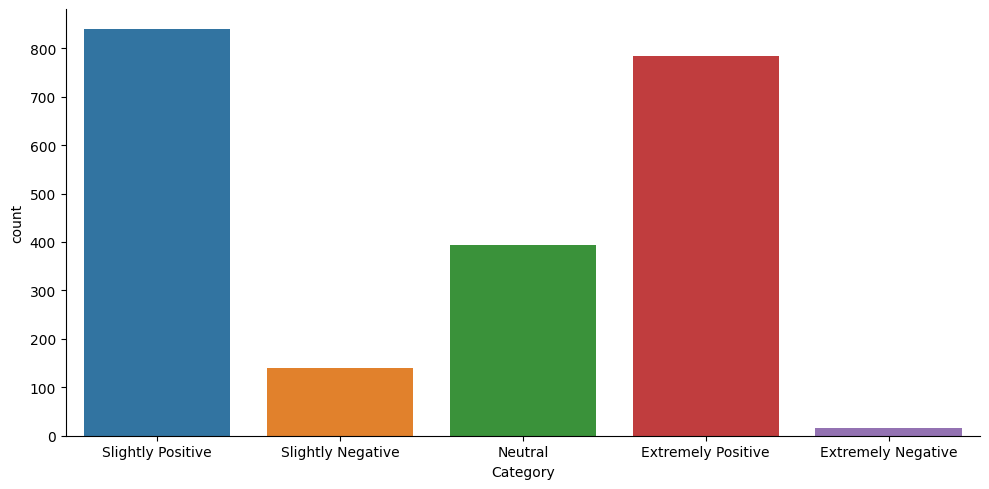

In [41]:
#make a graph of categories
sns.catplot(x='Category',kind='count',data=new_df, aspect=2)

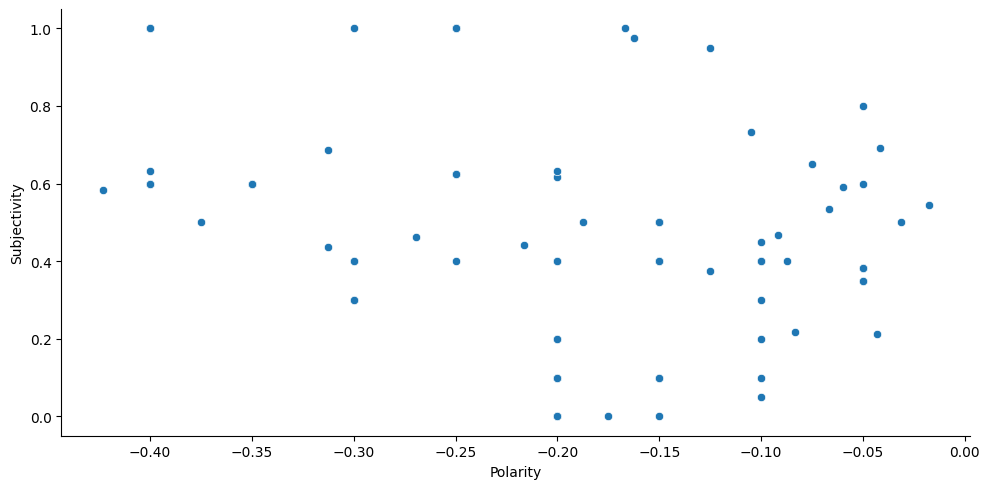

In [42]:
#Plot Subj & polarity
sns.relplot(x='Polarity', y='Subjectivity', data=df_positive, aspect=2)

In [43]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(new_df,"Category")

,Total,Percentage
Slightly Positive,839,38.66
Extremely Positive,783,36.08
Neutral,393,18.11
Slightly Negative,140,6.45
Extremely Negative,15,0.69


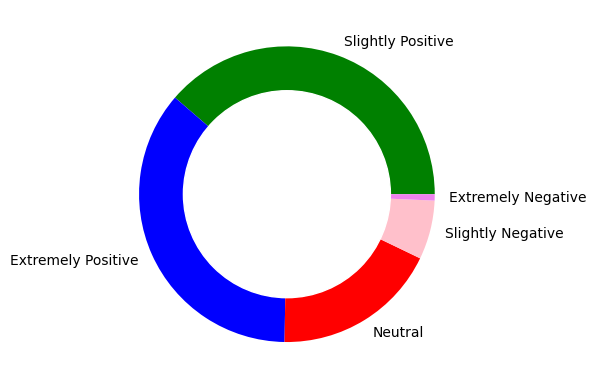

In [44]:
# create data for Pie Chart
piechart = count_values_in_column(new_df,"Category")
names= piechart.index
size=piechart["Percentage"]

 # Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red','pink','violet'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [45]:
#Segregate Negative

filter = {'Slightly Negative','Extremely Negative'}
df_negative = new_df.loc[new_df['Category'].isin(filter)]
df_negative.head()

,text,Subjectivity,Polarity,Category
1,just bought it for fun. no real use other than...,0.24375,-0.03125,Slightly Negative
43,alexa integration. actually unable to connect ...,0.43750,-0.31250,Slightly Negative
65,now hotstop not finding.... not connecting.. i...,0.50000,-0.10000,Slightly Negative
75,sometimes have issue in hearing the voice make...,1.00000,-0.50000,Extremely Negative
118,voice recognation is reducing with time. i hav...,0.80000,-0.05000,Slightly Negative


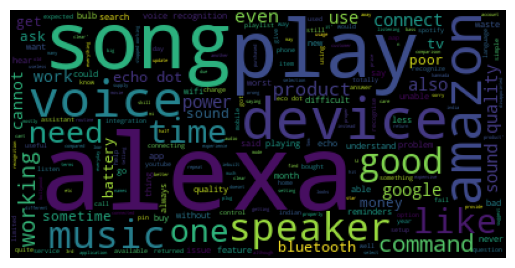

In [46]:

from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopwords = stopwords.words('english')


text = df_negative['text'].values 

wordcloud = WordCloud(stopwords=stopwords).generate(str(text))


plt.imshow(wordcloud)

plt.axis("off")
plt.show()

In [47]:
#Segregate Positive

filter = {'Slightly Positive','Extremely Positive'}
df_positive = new_df.loc[new_df['Category'].isin(filter)]
df_positive.head()

,text,Subjectivity,Polarity,Category
0,i had a mini for some time but it just wouldn’...,0.573571,0.372857,Slightly Positive
2,alexa cannot take over everything if you want ...,0.525000,0.175000,Slightly Positive
3,it is good but when we increase volume the bas...,0.566667,0.416667,Slightly Positive
5,its good,0.600000,0.700000,Extremely Positive
6,overall nice product,0.500000,0.300000,Slightly Positive


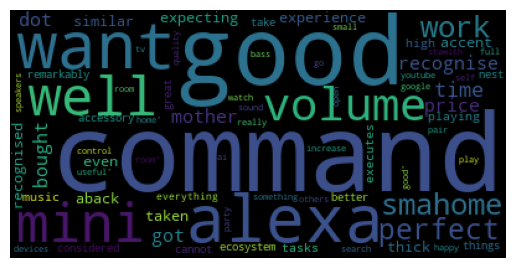

In [48]:

from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopwords = stopwords.words('english')


text = df_positive['text'].values 

wordcloud = WordCloud(stopwords=stopwords).generate(str(text))


plt.imshow(wordcloud)

plt.axis("off")
plt.show()

# building n2_bigram, n3_trigram

In [49]:
#Function to ngram
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(new_df['text'],(2,2),20)
n2_bigrams

[('sound quality', 270),
 ('echo dot', 165),
 ('voice recognition', 157),
 ('good product', 118),
 ('quality good', 88),
 ('nice product', 71),
 ('product good', 44),
 ('good sound', 40),
 ('amazon music', 38),
 ('bluetooth speaker', 37),
 ('really good', 34),
 ('google home', 33),
 ('value money', 33),
 ('alexa app', 33),
 ('recognition good', 31),
 ('amazing product', 29),
 ('3rd gen', 28),
 ('overall good', 26),
 ('dot 3rd', 25),
 ('google assistant', 25)]

In [50]:
#n3_trigram
n3_trigrams = get_top_n_gram(new_df['text'],(3,3),20)
n3_trigrams

[('sound quality good', 67),
 ('voice recognition good', 30),
 ('good sound quality', 27),
 ('echo dot 3rd', 19),
 ('amazon echo dot', 16),
 ('good voice recognition', 15),
 ('alexa echo dot', 15),
 ('dot 3rd gen', 13),
 ('product sound quality', 12),
 ('google home mini', 12),
 ('dot 3rd generation', 11),
 ('sound quality excellent', 10),
 ('translate review english', 10),
 ('product voice recognition', 8),
 ('product really good', 8),
 ('overall good product', 8),
 ('sound quality great', 8),
 ('voice recognition sound', 7),
 ('recognition sound quality', 7),
 ('quality good voice', 7)]